In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [586]:
df=pd.read_csv("Dataset.csv")

In [885]:
df_temp=pd.read_csv("Dataset.csv")
df_temp['freetime']
df['freetime']=df_temp['freetime']

0    0.0
Name: absences, dtype: float64

In [587]:
df.describe()

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
count,649.000000,576.000000,576.000000,649.000000,649.000000,604.000000,649.000000,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000
mean,2.514638,2.303819,1.574653,0.221880,3.930663,3.172185,3.184900,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295
std,1.134552,1.111076,0.744592,0.593235,0.955717,1.044684,1.175766,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000
75%,4.000000,3.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000


Checking different column titles


In [909]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     649 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        649 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  649 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      649 non-null    object 
 19  internet    649 non-null    o

Investigating number of null values in columns

In [589]:
df.nunique()

school         2
sex            2
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
famrel         5
freetime       5
goout          5
Dalc           5
health         5
absences      24
G1            17
G2            16
G3            17
Feature_1      8
Feature_2      4
Feature_3      5
romantic       2
dtype: int64

No unwanted/nonsense values exist in any of the columns and all values are as specified and in required format

In [591]:
mode_fedu=df['Fedu'].mode()[0]
df['Fedu']=df['Fedu'].fillna(mode_fedu)


Replacing Fedu column with mode of values

In [592]:
mode_tt=df['traveltime'].mode()[0]
df['traveltime']=df['traveltime'].fillna(mode_tt)
mode_tt

np.float64(1.0)

Replacing travetime witih mode value

In [595]:
mode_ft=df['freetime'].mode()[0]
df['freetime']=df['freetime'].fillna(mode_ft)
mode_ft

np.float64(3.0)

Replacing freetime with mode value

In [887]:
input_cols=list(['school','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','famrel','goout','Dalc','health','G1','G2','G3'])
target_col='freetime'

Creating a predictive model to predict missing values for some coloumns

In [888]:
train_input=df[input_cols][df[target_col].notna()].copy()
train_target=df[target_col].dropna()

Taking training values from non null rows of target 

In [889]:
numeric_cols=train_input.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_input.select_dtypes('object').columns.tolist()

Seperating numeric and categorical columns in the training set

In [815]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_input[numeric_cols])
train_input[numeric_cols]=scaler.transform(train_input[numeric_cols])

Scaling training input values in the range of 0-1

In [890]:
from sklearn.preprocessing import OneHotEncoder
encoder =OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(train_input[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_input[encoded_cols]=encoder.transform(train_input[categorical_cols])

Converting categorical columns by onehot encoding,creating new onehot vector columns for each categorical data and adding it to the original training dataset

In [891]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression(solver='liblinear')
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

Creating LinearRegression and LogisticRegression objects for predictive functions

In [892]:
model2.fit(train_input[numeric_cols+encoded_cols],train_target)

LinearRegression()

Performing LinearReg fit 

In [895]:
model2.coef_

array([-0.10313869,  0.06935349, -0.09177054,  0.09318641,  0.10976133,
        0.26523805,  0.01499799,  0.03723903,  0.02248694, -0.01315873,
       -0.0247724 , -0.03727187,  0.03727187, -0.09588268,  0.09588268,
        0.00972448, -0.00972448,  0.03294941, -0.03294941,  0.01225891,
       -0.01225891, -0.13757179, -0.03766263, -0.12182615, -0.0407774 ,
        0.33783797,  0.19029876, -0.20658971,  0.06068298, -0.07863356,
        0.03424154,  0.0661069 , -0.0583289 , -0.07924778,  0.07146979,
       -0.02356622, -0.0209779 ,  0.04454412, -0.04290287,  0.04290287,
       -0.01932646,  0.01932646,  0.20601625, -0.20601625, -0.0938707 ,
        0.0938707 ,  0.01515373, -0.01515373,  0.07536962, -0.07536962,
       -0.03858566,  0.03858566])

Obtaining coefficients(weights=w) for LinearRegression model obtained

In [896]:
x_train=train_input[numeric_cols+encoded_cols]
train_preds=list(model2.predict(x_train))
train_preds

[np.float64(2.8547595874809293),
 np.float64(3.154452794817143),
 np.float64(2.6190025622984967),
 np.float64(2.49892796712131),
 np.float64(2.539303758687227),
 np.float64(3.185787093192556),
 np.float64(3.32009169284206),
 np.float64(2.951022004585976),
 np.float64(2.583568875435272),
 np.float64(2.9480926003012993),
 np.float64(2.9807576339330772),
 np.float64(2.928502118973837),
 np.float64(3.536186421397126),
 np.float64(2.8649330398294115),
 np.float64(3.0713978389225605),
 np.float64(2.908511600597472),
 np.float64(3.0248029585142135),
 np.float64(3.930352082703405),
 np.float64(3.0883497182335997),
 np.float64(2.842020323545033),
 np.float64(2.3060871156094036),
 np.float64(3.0381026626182455),
 np.float64(3.816925369631077),
 np.float64(3.100911241649851),
 np.float64(2.324207211069852),
 np.float64(2.8929220333634356),
 np.float64(2.7764693087285726),
 np.float64(3.1920096692037756),
 np.float64(3.915258013517901),
 np.float64(2.533298089352823),
 np.float64(2.693392764942563

Extracting final input setc for training and finall storing the predicted output

In [897]:
def rmse(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)
    return np.sqrt(np.mean((predictions - targets) ** 2))

Defining rmse function to evaluate error in LinearReg model

In [898]:
rmse(train_preds,train_target)

np.float64(0.9343536415568179)

Implementing rmse function

In [880]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,train_preds)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Obtaining accuracy score for Logistic Regression models

In [724]:
train_probs=model.predict_proba(x_train)

Getting probabilities for predicted outputs in Logistic Regression model

In [903]:
inputs_to_predict=df[df[target_col].isna()][input_cols]

Extracting values of other columns from null rows of target column

In [902]:
inputs_to_predict[numeric_cols]=scaler.transform(inputs_to_predict[numeric_cols])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- freetime


For numeric values in Logistic regression,performing scaling in 0-1 range

In [904]:
inputs_to_predict[encoded_cols]=encoder.transform(inputs_to_predict[categorical_cols])

Onehot encoding of actual inputs

In [905]:
x_input_to_predict=inputs_to_predict[numeric_cols+encoded_cols]
prediction=model2.predict(x_input_to_predict)
prediction = prediction.round().astype(int)
prediction

array([3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 4, 3, 4, 3, 4, 3, 3, 3, 4,
       3])

Obtaining final prediction

In [906]:
prob=model.predict_proba(x_input_to_predict)
prob

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Probabilities of predicted outputs

In [907]:
null_indices = df[df[target_col].isnull()].index
df.loc[null_indices, target_col] = prediction

Replacing null indices of target colums with predicted outputs

Now we have all input columns except F!,F2,F3 filled with either predicted values or some meaningful statistical values


Next step is performing EDA to infer hidden features and relationships between targets and inputs

In [910]:
df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Feature_1', 'Feature_2', 'Feature_3', 'romantic'],
      dtype='object')

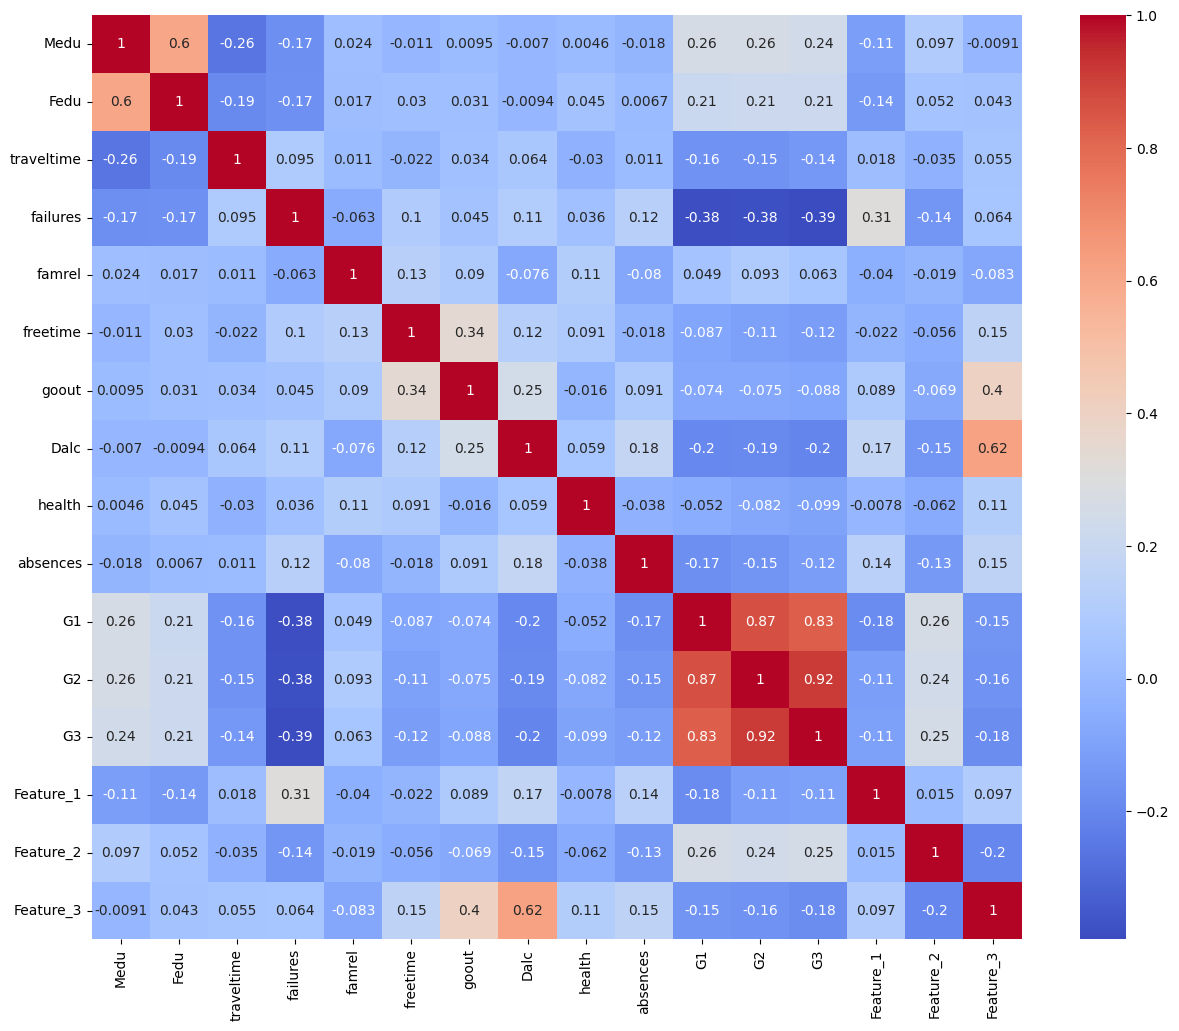

In [914]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(15, 12))
sb.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Feature1:Not much correlations with any of the features.


Fair relation with (+)FAILURES

Very less relation with (-)Medu,Fedu,and grades

Feature2:Fair relation with GRADES

Slight negative relation with F3


very less negative relation with failures

Feature3:Good positive relation with alcohol weekly consumption


fair positive reln with go out with friends

Slight negative relation with grades

slight positive relation with health and absences

In [935]:
df.Feature_3.describe()

count    610.000000
mean       2.262295
std        1.285279
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Feature_3, dtype: float64

Feature_3 has to be some index between 1-5

In [943]:
fig = px.scatter(df, x='Dalc', y='Feature_3', 
                 title='Feature_3 vs Weekday Alcohol Consumption',
                 trendline='ols')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed